<a href="https://colab.research.google.com/github/masa512/basic_diffusion/blob/main/02_diffusion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For Colab

In [107]:
# Import OS
import os

In [2]:
# Load Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Git Credentials
# Define your GitHub username and repository
github_username = "masa512"
github_name = "Masayoshi Sakakura"
github_email = "ms4@illinois.edu"
repo_name = "basic_diffusion"

os.system(f"git config --global user.email {github_email}")
os.system(f"git config --global user.name {github_name}")

# Store your PAT in a variable
pat = !cat /content/drive/MyDrive/git_access/PAT.txt
pat = pat[0]

In [4]:
# Git Clone Repository
!git clone https://github.com/masa512/basic_diffusion.git
%cd basic_diffusion/dm

Cloning into 'basic_diffusion'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 37 (delta 8), reused 32 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 309.15 KiB | 6.31 MiB/s, done.
Resolving deltas: 100% (8/8), done.
/content/basic_diffusion/dm


In [44]:
# Construct the command dynamically
git_url = f"https://{pat}@github.com/{github_username}/{repo_name}.git"

# Set the new remote URL
os.system(f"git remote set-url origin {git_url}")

print("Git remote URL updated successfully.")

Git remote URL updated successfully.


In [122]:
# Git add & commit
!git add .
!git commit -m "At least upto before running the training session.."

[main afc7818] At least upto before running the training session..
 3 files changed, 42 insertions(+), 4 deletions(-)


In [123]:
# Git push
!git push origin main

Enumerating objects: 15, done.
Counting objects: 100% (15/15), done.
Delta compression using up to 2 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 2.28 KiB | 2.28 MiB/s, done.
Total 8 (delta 4), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/masa512/basic_diffusion.git
   ee44dec..afc7818  main -> main


In [8]:
%cd dm

/content/basic_diffusion/dm


In [5]:
%pip install -e .

Obtaining file:///content/basic_diffusion/dm
  Preparing metadata (setup.py) ... done
  Running setup.py develop for dm


# Forward Diffusion

In [108]:
import matplotlib.pyplot as plt
import numpy as np
# Try to feed data in nn
import torch
import torch.optim as optim


%reload_ext autoreload
%autoreload 2
from dm.util import swiss_roll_wrapper,diffusion_dataset,data_split,dataloader_wrapper
from dm.fwd_diffusion import fwd_diffusion,closed_form_forward_target
from dm.simple_network import simple_DDPM

In [109]:
# Sample data
data = swiss_roll_wrapper(n_samples=2000,dim = 2)

## Test of Closed form Diffusion Forward Process

In [118]:
# Try for t = 200/1000

data_200 = [closed_form_forward_target(data[i,:],t = 250) for i in range(data.shape[0])]
data_200 = np.array(data_200)

# Try for t = 600/1000

data_600 = [closed_form_forward_target(data[i,:],t = 800) for i in range(data.shape[0])]
data_600 = np.array(data_600)

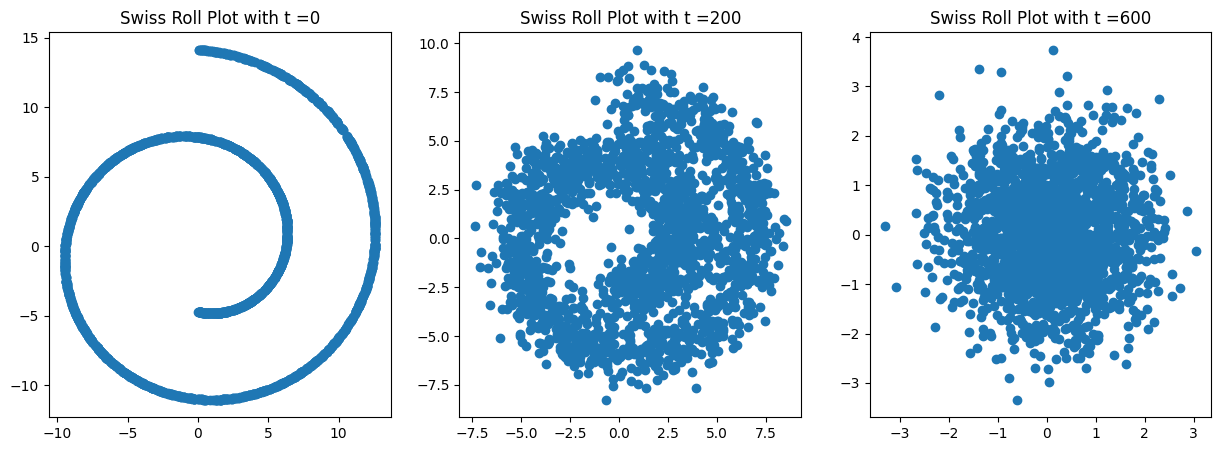

In [119]:
# Plot orig & noisier
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].set_title(f'Swiss Roll Plot with t ={0}')
ax[0].scatter(data[:,0],data[:,1])

ax[1].set_title(f'Swiss Roll Plot with t ={200}')
ax[1].scatter(data_200[:,0],data_200[:,1])

ax[2].set_title(f'Swiss Roll Plot with t ={600}')
ax[2].scatter(data_600[:,0],data_600[:,1])

# Backward Process (DDPM)

In [101]:
# Define the neural network
network = simple_DDPM(input_dim = 2)
print(network)

simple_DDPM(
  (t_embedding): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
  )
  (model): Sequential(
    (0): Linear(in_features=130, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=2, bias=True)
  )
)


In [102]:
# Generate swiss-roll torch dataset
data = swiss_roll_wrapper(n_samples=2000,dim = 2)
diff_data = diffusion_dataset(data)

In [104]:
# Split
train_set, test_set = data_split(diff_data,train_rate=0.8,shuffle=True)

In [121]:
optimizer = optim.Adam(network.parameters())
# Dataloaders
batch_size = 64
trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)


AttributeError: partially initialized module 'torch._dynamo' has no attribute 'config' (most likely due to a circular import)